In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, div.text_cell_render ol li p, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [8]:
import warnings
import os
import logging
# 경고 제거
warnings.filterwarnings('ignore')

# transformers 로깅 레벨 조정
logging.getLogger("transformers").setLevel(logging.ERROR)

# Hugging Face symlink 경고 제거
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# from transformers import pipeline, logging as hf_logging
# hf_logging.set_verbosity_error()

# <span style="color:red">ch1. 허깅페이스</span>
- Inference API 이용 : 모델의 결과를 surver에서
- pipeline()이용 : 모델을 다운로드받아 모델의 결과를 local에서
    * raw text -> tokenizer -> model -> [0.11, 0.55, 0.xx, ~] logits값으로 prediction 결과 출력
```
허깅페이스 transformers에서 지원하는 task
"sentiment-analysis" : "text-classification"의 별칭(감정분석 전용으로 사용)
"text-classification" : 감정분석, 뉴스분류, 리뷰 분류 등 일반적인 문장 분류
"zero-shot-classification" : 레이블을 학습 없이 주어진 후보군 중에서 분류
"token-classification" : 개체명 인식(NER : Named Entity Recognition) 등 단위 라벨링
"ner" : "token-classification"의 별칭
"fill-mask": 빈칸 채우기 
"text-generation" : 텍스트 생성 (GPT류 모델에 사용)
"text2text-generation" : 번역, 요약 등 입력 -> 출력 변환
"translation" : 번역
"summerization" : 텍스트요약
"question-answering" : 주어진 context를 보고 질문에 답하기.
"image-to-text" : 그림을 설명
"image-classification" : 이미지 분류

```

## 1. 텍스트 기반 감정분석(긍정/부정)
- C:\Users\Admin\.cache\huggingface\hub

In [8]:
from transformers import pipeline
classifier = pipeline(task="sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [9]:
classifier = pipeline(task="text-classification",
                     model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# 감정분석시 내용이 많으면 list로
classifier([
    "I've been waiting for a HuggingFace course my whole life."
    "I hate this so much!"
])

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9982663989067078}]

In [10]:
classifier("이 영화 정말 최고였어요. 감동적이고 연기가 대단해")

[{'label': 'POSITIVE', 'score': 0.857815682888031}]

In [11]:
classifier("이 물건 정말 사고 싶어요")

[{'label': 'POSITIVE', 'score': 0.8577604293823242}]

In [12]:
classifier(["I like you", "I hate you", "나 너가 싫어", ""])

[{'label': 'POSITIVE', 'score': 0.9998695850372314},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'NEGATIVE', 'score': 0.599323034286499},
 {'label': 'POSITIVE', 'score': 0.7481212019920349}]

In [13]:
classifier = pipeline(task = "sentiment-analysis",
                     model="matthewburke/korean_sentiment")
texts = ['나는 너가 좋아', "당신이 싫어요", "힘들어요","오늘 기분이 최고야"]

result = classifier(texts)

Device set to use cpu


In [14]:
result

[{'label': 'LABEL_1', 'score': 0.9557897448539734},
 {'label': 'LABEL_0', 'score': 0.9092598557472229},
 {'label': 'LABEL_0', 'score': 0.9140233397483826},
 {'label': 'LABEL_1', 'score': 0.9714491367340088}]

In [15]:
from transformers import pipeline
classifier = pipeline(task="sentiment-analysis",
                     model="matthewburke/korean_sentiment")
classifier(['나는 너가 좋아', "당신이 싫어요", "힘들어요", "오늘 기분이 최고야"])

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.9557897448539734},
 {'label': 'LABEL_0', 'score': 0.9092598557472229},
 {'label': 'LABEL_0', 'score': 0.9140233397483826},
 {'label': 'LABEL_1', 'score': 0.9714491367340088}]

## 2. 제로샷분류(Zero-shot분류)
- 기계학습 및 자연어처리에서 각 개별 작업에 대한 특정 교육없이 작업을 수행할 수 있는 모형(비지도학습)

In [16]:
classifier = pipeline("zero-shot-classification")

classifier(
    "I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5227580070495605,
  0.45814019441604614,
  0.0142647260800004,
  0.0026850001886487007,
  0.002152054337784648]}

In [17]:
sequence_to_classify = "One day i will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'One day i will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9939888715744019, 0.0032361410558223724, 0.002775018336251378]}

# 3. text 생성


In [18]:

from transformers import pipeline, set_seed
# set_seed(2)
generation = pipeline("text-generation", "gpt2") # 텍스트 생성 gpt3부터는 허깅페이스없음
generation(
    "in this course. We will teach you how to",
    pad_token_id=generation.tokenizer.eos_token_id
) # pad_token_id 경고를 없애려고 setting

Device set to use cpu


[{'generated_text': 'in this course. We will teach you how to set up your own CNC machines to produce wireframe prints using a CNC mill for your project.\n\nThe CNC mill is used to cut and engrave wireframe prints. This is a very simple process. You will need a CNC mill that is good for 60 to 70° angles and can be used in a variety of applications. For a quick overview on how to set up your own, check out our previous CNC mill tutorial.\n\nWe will start with a CNC mill that is capable of producing wireframe prints, but you will need a large CNC mill for our project. You will also need a small CNC mill, but we will refer you to our CNC mill tutorial for a detailed explanation of how your CNC mill can handle a large project. We will also show you how to set your own. Once you have completed our course, you will be able to begin building your own CNC mill.\n\nThe CNC mill will be available in two colors: black for the traditional CNC mill and black for the CNC mill made from a metal die.\

In [19]:
from transformers import pipeline
generation = pipeline("text-generation", "skt/kogpt2-base-v2")
result = generation(
    "이 과정은 다음과 같은 방법을 알려드려요. ",
    pad_token_id = generation.tokenizer.eos_token_id,
    max_new_tokens = 100, # 생성할 최대 길이(생성할 토큰 수)
    num_return_sequences=1, # 생성할 문장 갯수
    do_sample=True,          # 다양할 샘플 사용
    top_k = 50,         # top-k 샘플링(확률 높은 상위 50개 토큰만 사용)
    top_p = 0.95,
    temperature = 1.2,           # 창의성 조절(낮을 수록 보수적)
    no_repeat_ngram_szie = 2 # 반복 방지
)
print(result[0]['generated_text'])

Device set to use cpu


ValueError: The following `model_kwargs` are not used by the model: ['no_repeat_ngram_szie'] (note: typos in the generate arguments will also show up in this list)

## 4. 마스크(빈칸)채우기

In [20]:
unmasker = pipeline(task='fill-mask',
                   model='distilbert/distilroberta-base') # 마스크 채우기
unmasker("I'm going to hospital and meet a <mask>", top_k=2) # top_k 기본값 5

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.19275707006454468,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor"},
 {'score': 0.06794589757919312,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "I'm going to hospital and meet a psychiatrist"}]

In [21]:

unmasker("Hello, I'm a <mask> model.")

[{'score': 0.0629730075597763,
  'token': 265,
  'token_str': ' business',
  'sequence': "Hello, I'm a business model."},
 {'score': 0.038101598620414734,
  'token': 18150,
  'token_str': ' freelance',
  'sequence': "Hello, I'm a freelance model."},
 {'score': 0.03764132782816887,
  'token': 774,
  'token_str': ' role',
  'sequence': "Hello, I'm a role model."},
 {'score': 0.037326786667108536,
  'token': 2734,
  'token_str': ' fashion',
  'sequence': "Hello, I'm a fashion model."},
 {'score': 0.026023676618933678,
  'token': 24526,
  'token_str': ' Playboy',
  'sequence': "Hello, I'm a Playboy model."}]

In [22]:

unmasker("안녕하세요? 나는 <mask> 모델이예요.", top_k=3)

[{'score': 0.14130638539791107,
  'token': 35,
  'token_str': ':',
  'sequence': '안녕하세요? 나는: 모델이예요.'},
 {'score': 0.1223798543214798,
  'token': 116,
  'token_str': '?',
  'sequence': '안녕하세요? 나는? 모델이예요.'},
 {'score': 0.08188082277774811,
  'token': 328,
  'token_str': '!',
  'sequence': '안녕하세요? 나는! 모델이예요.'}]

 ## InferenceAPI 사용
 

In [23]:
from dotenv import load_dotenv
import os
load_dotenv()
# os.environ['HF_TOKEN']
# 허깅페이스 토근을 READ권한으로 생성하여 .env에 추가 (.gitignore파일 추가)

True

In [24]:
# unmasker = pipeline(task="fill-mask", model="google-bert/bert-base-uncased")
# unmasker("Hello, I'm a [MASK] model.")
from dotenv import load_dotenv
import os
load_dotenv()
from huggingface_hub import InferenceClient
client = InferenceClient(
            provider="hf-inference",
            api_key=os.environ['HF_TOKEN'], #허깅이페이스 토큰 키
)
result = client.fill_mask(
    "Hello, I'm a [MASK] model.",
    model="google-bert/bert-base-uncased",
    top_k=2 #기본 5개
)
result

HfHubHTTPError: (Request ID: Root=1-69368c60-5695dd4c4c3e70485c655e23;6a2ea519-01d7-453e-9bfc-2cca0c5486c7)

403 Forbidden: This authentication method does not have sufficient permissions to call Inference Providers on behalf of user MYSTERY7CITY.
Cannot access content at: https://router.huggingface.co/hf-inference/models/google-bert/bert-base-uncased.
Make sure your token has the correct permissions.

# 5. 개체명 인식(NER : NAMED ENTITY RECogNITION

In [25]:
from transformers import pipeline
ner = pipeline(task = "ner,
               model ="bmdz/bert-large-cased-finetuned-conll03-english",
               grouped_entities=True) # 개체들을 그룹으로 묶을지 말지

ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

SyntaxError: unterminated string literal (detected at line 2) (748120307.py, line 2)

# 6. 질의 응답

In [26]:
from transformers import pipeline
question_answerer = pipeline("question-answering",
                          "distilbert/distilbert-base-cased-distilled-squad")

question_answerer(
    question = "Where do I work?",
    context = "My name is Sylvain and I work at Hugging Face in Brooklyn."
) # 지문(context)을 이용해서 답하기

Device set to use cpu


{'score': 0.6385911703109741, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [27]:
context = "My name is Sylvain and I work at Hugging Face in Brooklyn."
result = question_answerer(question="Where do I work?", context=context)

In [28]:
result.get('answer'), context[result.get('start') : result.get('end')], result.get('score')

('Hugging Face', 'Hugging Face', 0.6385911703109741)

## 7. 문서요약
- 현재 torch 버전이 2.6이하이면 Hugging Face에서 강제로 막고 있음

In [29]:
summarizer = pipeline("summarization",
                     model = "sshleifer/distilbart-cnn-12-6")

summarizer(
    """
    As long as Trump is in the Oval Office and Netanyahu and his extremist coalition are in the driver’s seat 
    of the relationship, it is doubtful that Washington will fully commit to a coherent, 
    institutionalized new approach. Yet it is not too soon to begin reckoning with what has 
    gone wrong and discussing how to fix it. If the next opportunity to reset the increasingly 
    vulnerable U.S.-Israeli relationship is missed, it will be to the detriment of Americans, Israelis, 
    and Palestinians alike.
    """,
    max_length = 130, # 요약할 내용의 최대 토큰 수
    min_length=30,    # 요약할 내용의 최소 토큰 수
    do_sample=False   # 랜덤성이 없음/항상 비슷한 요약


)

Device set to use cpu


[{'summary_text': " As long as Trump is in the Oval Office and Netanyahu and his extremist coalition are in the driver's seat, it is doubtful that Washington will fully commit to a coherent,  institutionalized new approach . Yet it is not too soon to begin reckoning with what has    gone wrong and discussing how to fix it ."}]

In [30]:
pip show sacremoses

Name: sacremoses
Version: 0.1.1
Summary: SacreMoses
Home-page: https://github.com/hplt-project/sacremoses
Author: 
Author-email: 
License: 
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## 8. 번역
- pip install sacremoses : 한영번역에서의 경고를 줄이고, 번역품질을 높히기 위해



In [31]:
translator = pipeline(task = "translation",
                     model = "Helsinki-NLP/opus-mt-fr-en")
# 프랑스어 -> 영어 : 헬싱키NLP는 다양한 언어 지원

Device set to use cpu


In [32]:
result = translator("Ce cours est produit par Huging Face.")
result[0]['translation_text']

'This course is produced by Hugging Face.'

In [36]:
# 번역하는 모델은 성능이 천차만별. 모델과 라이브러리에 따라 추가 pip 설치
# 한 -> 영
ko2en = pipeline(task="translation", model = "Helsinki-NLP/opus-mt-ko-en")

# 영 -> 한(불량)
en2ko = pipeline(task="translation", model="Helsinki-NLP/opus-mt-tc-big-en-ko")

# 테스트 문자
ko_sentence = "이 문장을 영어로 번역해 주세요."
en_sentence = "I enjoy learning about AI."

# 번역수행

print('한 -> 영 :', ko2en(ko_sentence)[0]['translation_text'])
print('영 -> 한 :', en2ko(en_sentence)[0]['translation_text'])



Device set to use cpu
Device set to use cpu


한 -> 영 : Please translate this sentence into English.
영 -> 한 : US  팽창식 줄.


In [37]:
ko2en([
    "내일부터는 langChain 진도 나갑니다",
    "Open Ai API 진도 나갑니다.",
    "카드를 지참하셔야 합니다"
])
# 동적 웹크롤링과 비교하여 선택

[{'translation_text': "Tomorrow, we're even going to the Langcain camp."},
 {'translation_text': 'Open Ai APl.'},
 {'translation_text': 'You need to hold on to your cards.'}]

## 9. 이미지를 설명하는 텍스트 생성

In [1]:
from transformers import pipeline
image2text = pipeline(task="image-to-text",
                     model="ydshieh/vit-gpt2-coco-en")

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\transformers\models\auto\modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


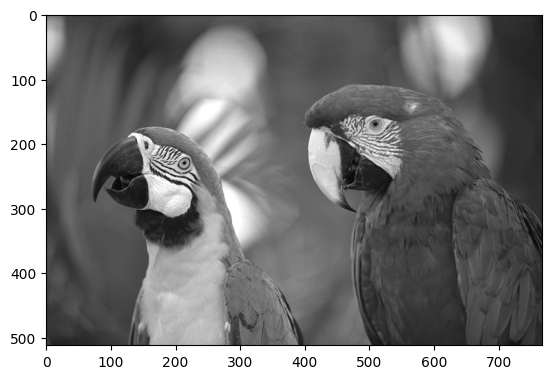

In [2]:
from PIL import Image
import numpy as np
import requests
url = "https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png"
image = Image.open(requests.get(url, stream=True).raw)
print(type(image))
image_numpy = np.array(image)
print(type(image_numpy))
import matplotlib.pyplot as plt
plt.imshow(image_numpy, cmap='gray')


In [3]:
url = "https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png"
image2text(url, max_new_tokens=30) # 최대 30토큰으로 이미지에 대해 설명하는 text

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'two birds are standing next to each other '}]

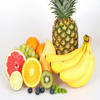

In [4]:
# 내 로컬 pc의 이미지를 설명해줘
from PIL import Image
image = Image.open('images/fruits.jpeg')
image.resize((100,100))

In [5]:
image2text(image)

[{'generated_text': 'a fruit and vegetable stand with bananas, oranges, and apples '}]

# 10. 이미지 분류

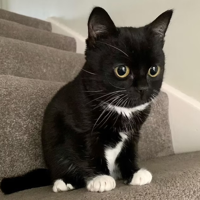

In [6]:
image = Image.open('images/cat.jpg')
image.resize((200,200))

In [8]:
imgClassifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [9]:
imgClassifier(image)

[{'label': 'Egyptian cat', 'score': 0.8531320691108704},
 {'label': 'tabby, tabby cat', 'score': 0.04750381037592888},
 {'label': 'tiger cat', 'score': 0.034866224974393845},
 {'label': 'Persian cat', 'score': 0.00755581958219409},
 {'label': 'Siamese cat, Siamese', 'score': 0.003788580419495702}]